In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# df = pd.read_csv('/content/drive/MyDrive/경제지표데이터/final_finance_data.csv')
df = pd.read_csv('/content/drive/MyDrive/경제지표데이터/finance_final_68.csv')

In [4]:
# 대한민국 경제지표 데이터 불러오기 & 타겟변수인 기준금리 따로 생성
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.set_index('날짜')
df_f = df['기준금리']
data = df_f.iloc[:-2]

In [5]:
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 247 entries, 2003-01-01 to 2023-07-01
Series name: 기준금리
Non-Null Count  Dtype  
--------------  -----  
247 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


# 시계열 데이터
- 정상성(stationary)
    - 관측된 시간에 대해 무관한 데이터
    - 평균과 분산이 일정함
    - ex) 백색소음
- 비정상성(Non-stationary)
    - 시간에 따라 평균수준이 다르거나 추세나 계절성에 영향을 받음
    - 비정상성 데이터는 예측범위가 무한대이고 고려할 파라미터들이 많음
    > 따라서 비정상성 데이터를 정상성으로 변환하여 분석을 진행하면 예측범위가 일정범위로 줄어들어 예측 성능이 개선되고, 고려할 파라미터의 수가 감소하여 보다 단순한 알고리즘으로 예측 가능, 과적합도 방지할 수 있음

    > 변환 방법 중에는 **평균의 정상화를 위한 차분과, 분산의 안정화를 위한 로그 변환, 제곱/제곱근 변환** 등이 있다.


## 원본시계열, 이동평균, 이동표준편차 시각화

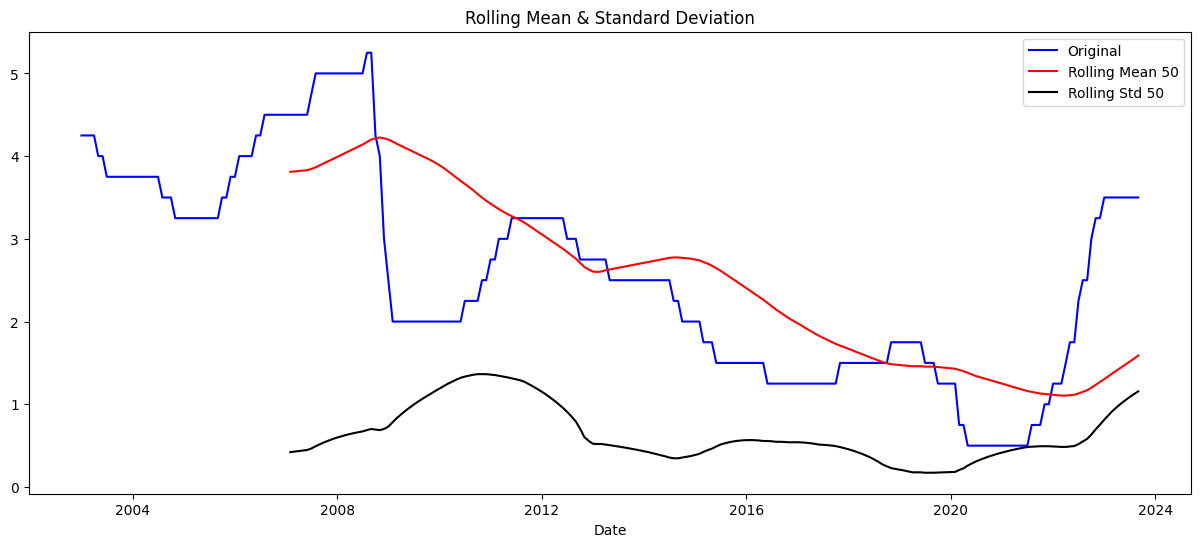

In [ ]:
def plot_rolling(data, interval):
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()
    #Plot rolling statistics:
    plt.figure(figsize=(15, 6))
    plt.xlabel('Date')
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean {}'.format(interval))
    std = plt.plot(rolstd, color='black', label = 'Rolling Std {}'.format(interval))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

# 50일치 평균내어 이동평균계산
plot_rolling(data, 50)

# ARIMA 모델

- AR : 자기회귀모형(Autoregressive). p시점 만큼 앞선 시점까지의 값에 영향을 받는 모형.
- I : integrated. 누적을 의미하며, 비정상성(Non-stationary) 데이터의 변환(평균의 정상화)을 위해 차분을 이용하는 시계열 모형에 붙이는 표현
- MA : 이동평균모형(Moving Average). q시점 만큼 앞선 시점까지의 연속적인 오차값들(shock)의 영향을 받는 모형.

 > AR(p), MA(q) 모형에 차분(d)을 이용해 비정상성을 제거하는 과정을 더하여 ARIMA(p,d,q)로 표현한다.



# ADF 테스트
- 시계열 데이터의 정상성 여부를 확인하는 방법

- p-value > 0.05   
: 귀무가설 기각 실패 -> 비정상성 데이터

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
  result = adfuller(data.values)
  print('ADF Statistics: %f' % result[0])
  print('p-value: %f' % result[1])
  print('num of lags: %f' % result[2])
  print('num of observations: %f' % result[3])
  print('Critical values:')
  for k, v in result[4].items():
      print('\t%s: %.3f' % (k,v))
adf_test(data)

ADF Statistics: -2.303696
p-value: 0.170779
num of lags: 3.000000
num of observations: 245.000000
Critical values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


## p-value: 0.170779 이므로 비정상성을 띄고있음

ADF테스트결과
ADF Statistics: -5.642695
p-value: 0.000001
num of lags: 4.000000
num of observations: 243.000000
Critical values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


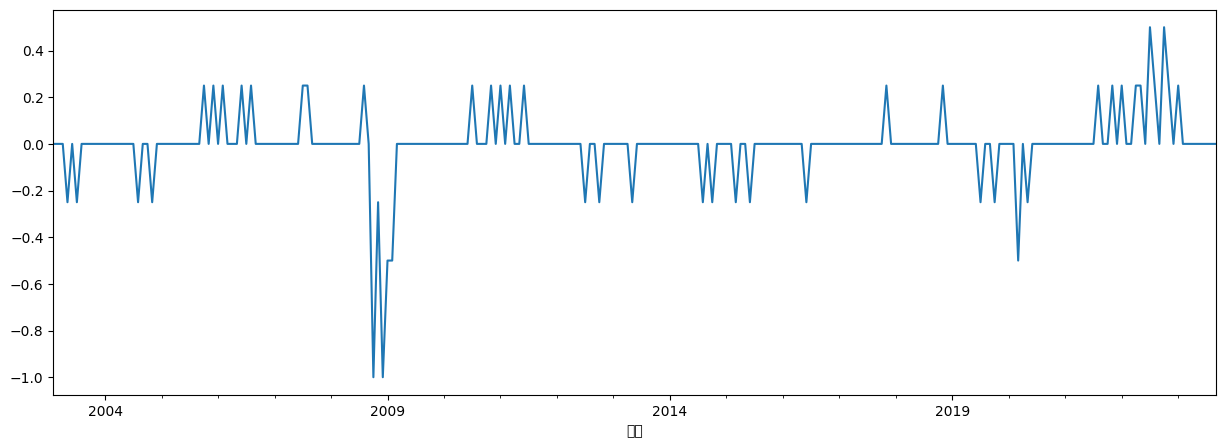

In [ ]:
# 1차 차분 데이터 diff1
dff1 = data.diff().dropna()
dff1.plot(figsize=(15,5))

print('ADF테스트결과')
adf_test(dff1)

ADF테스트결과
ADF Statistics: -3.171498
p-value: 0.021695
num of lags: 10.000000
num of observations: 236.000000
Critical values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


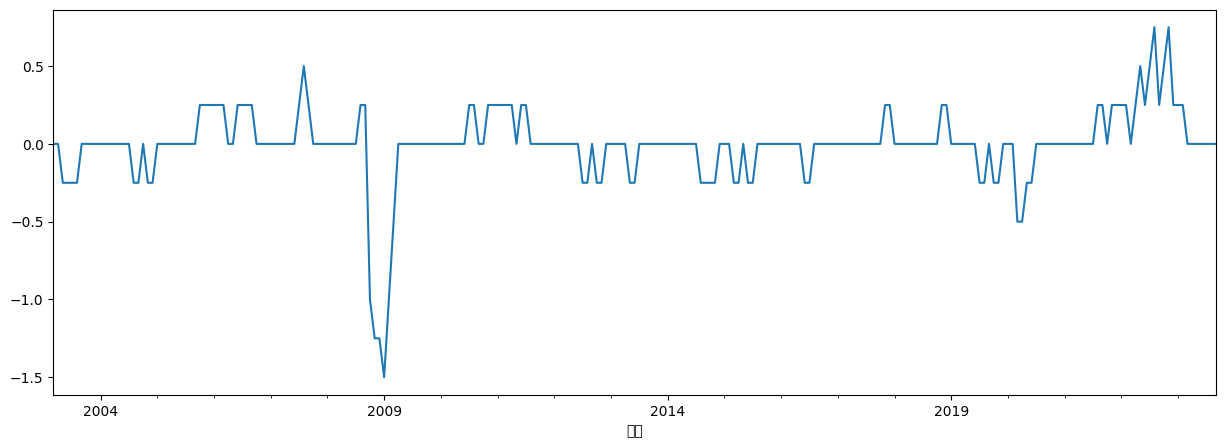

In [ ]:
# 2차 차분 데이터 diff1
dff2 = data.diff(2).dropna()
dff2.plot(figsize=(15,5))

print('ADF테스트결과')
adf_test(dff2)

# ARIMA (p,q)모수추정방법

- AR(p), 차분(d), MA(q)에서 보통 p+q <2, p*q=0 인 값을 많이 사용한다. (p,q둘 중 한 값이 0)
실제로는 AR 이나 MA 둘중 하나의 경향을 강하게 띄기 때문에 주로 이렇게 사용한다.

- 정상 시계열 데이터의 경우, ACF는 상대적으로 빠르게 0(상관관계 0)에 접근하고,
비정상 시계열 데이터의 경우, ACF는 천천히 감소하며 종종 큰 양의 값을 가진다.

    - AR(p) 모델 적합  
        - ACF plot : 천천히 감소
        - PACF plot : 첫 값으로부터 p개 뒤에 끊긴다
    - MA(q) 모델 적합  
        - ACF plot : 첫 값으로부터 q개 뒤에 끊긴다
        - PACF plot : 천천히 감소


## acf, pacf를 이용한 모수구하기

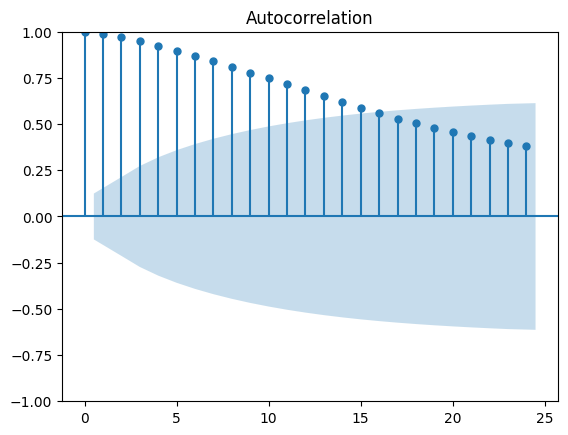

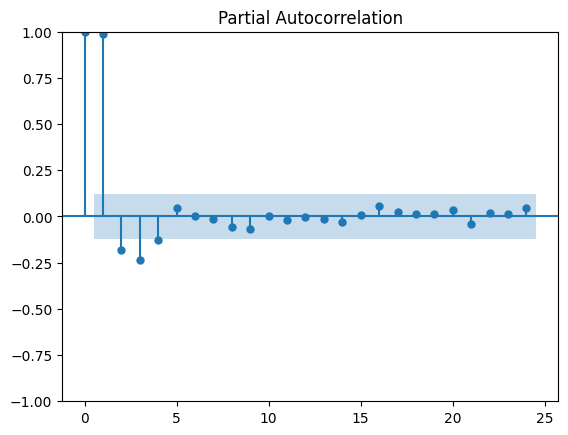

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plot_pacf(data)
plt.show()

- ACF plot가 천천히 감소되는 것으로 보아 주식 데이터는 주기에 따라 일정하지 않은 비정상성 데이터이고,
PACF plot에서 첫값으로부터 4개 이후 파란 박스에 들어가면서 그래프가 끊기는 것으로 보아 AR(4) 모델을 활용하는 것이 가장 적절할 것으로 예상된다.

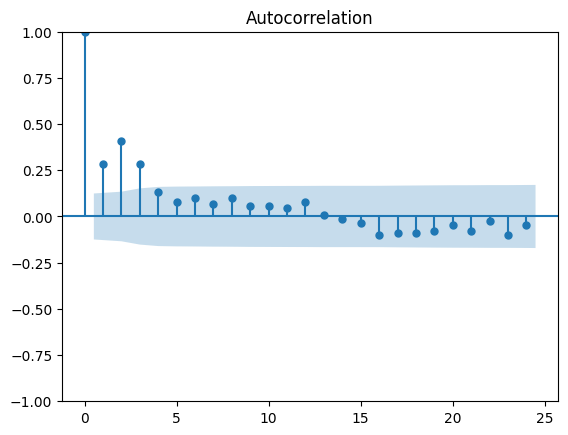

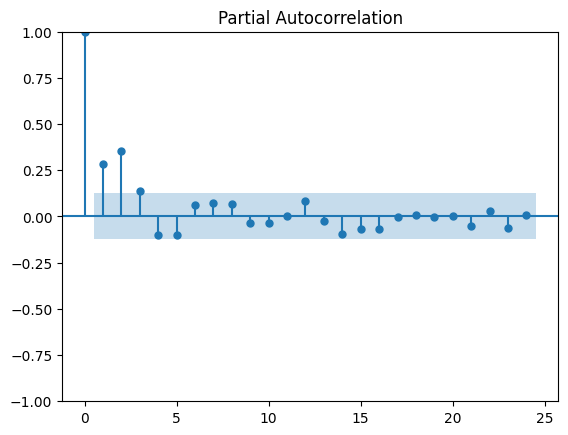

In [ ]:
plot_acf(dff1)
plot_pacf(dff1)
plt.show()

- AR(1), d(1), MA(0)

## ndiffs, auto_arima 이용

In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm
from pmdarima.arima import ndiffs
n_diffs = ndiffs(data, alpha=0.05, test='adf', max_d=6)
print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


In [ ]:
model = pm.auto_arima(
            y=data,
            d=1,
            start_p=0, max_p=3,
            start_q=0, max_q=3,
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-228.545, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-247.535, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-238.898, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-230.446, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-278.416, Time=0.46 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-281.010, Time=0.69 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-279.951, Time=1.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-279.093, Time=0.89 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-282.990, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-280.390, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-281.931, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-281.071, Time=0.15 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 4.831 seconds


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  249
Model:               SARIMAX(3, 1, 0)   Log Likelihood                 145.495
Date:                Wed, 22 Nov 2023   AIC                           -282.990
Time:                        08:48:14   BIC                           -268.936
Sample:                    01-01-2003   HQIC                          -277.332
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1358      0.067      2.026      0.043       0.004       0.267
ar.L2          0.3260      0.028     11.572      0.000       0.271       0.381
ar.L3          0.1348      0.043      3.153      0.002       0.051       0.219
sigma2         0.0181      0.001     35.162      0.000       0.017       0.019
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3801.45
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -2.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

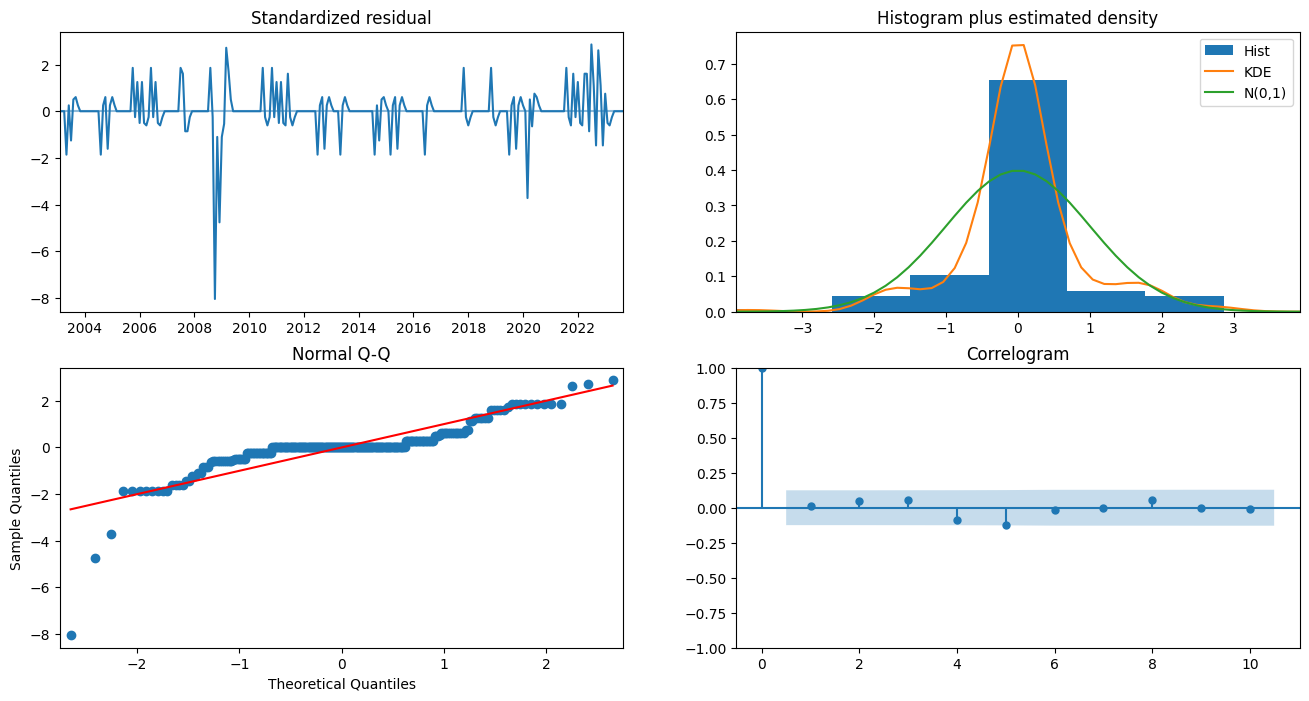

In [ ]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

# ARIMA모델 훈련과 테스트

In [ ]:
train_data, test_data = data[:int(len(data)*0.9)], data[int(len(data)*0.9):]

In [ ]:
model_fit = pm.auto_arima(
    	    y=train_data,
 	        d=n_diffs ,
            start_p=0, max_p=3,
            start_q=0, max_q=3,
            m=1, seasonal=False, # 계절성이 없음!
            stepwise=True,
            trace=True
)
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-224.080, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-238.756, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-231.648, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-223.486, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-266.768, Time=0.47 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-264.794, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-264.785, Time=0.73 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-252.707, Time=1.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-263.112, Time=1.49 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-268.188, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-239.362, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-266.230, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-266.215, Time=0.59 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-254.137, Time=0.38 sec
 ARIMA(3,1,1)(0,0,0)[0]          

In [ ]:
# forecast 함수
def forecast_n_step(model, n = 1):
    fc, conf_int = model.predict(n_periods=n, return_conf_int=True)
    # print("fc", fc,"conf_int", conf_int)
    return (
        fc.tolist()[0:n], np.asarray(conf_int).tolist()[0:n]
   )

def forecast(len, model, index, data=None):
    y_pred = []
    pred_upper = []
    pred_lower = []

    if data is not None:
        for new_ob in data:
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(new_ob)
    else:
        for i in range(len):
            fc, conf = forecast_n_step(model)
            y_pred.append(fc[0])
            pred_upper.append(conf[0][1])
            pred_lower.append(conf[0][0])
            model.update(fc[0])
    return pd.Series(y_pred, index=index), pred_upper, pred_lower

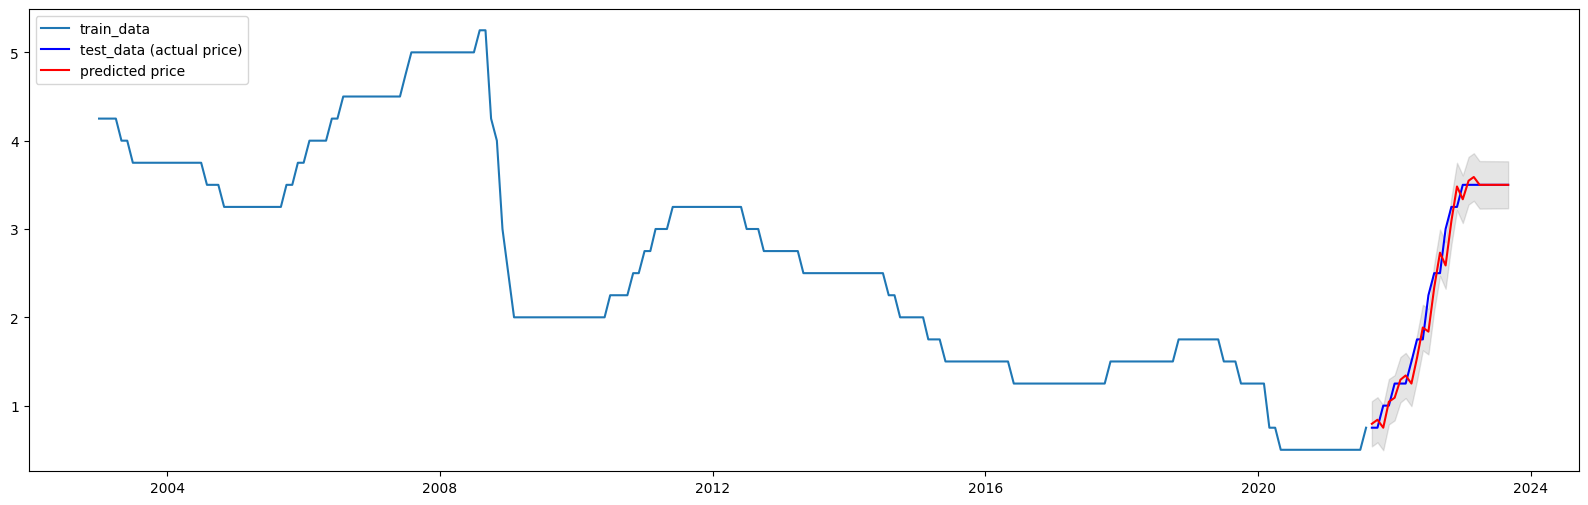

In [ ]:
# Forecast
fc, upper, lower = forecast(len(test_data), model_fit, test_data.index, data = test_data)

# pandas series 생성
# fc # 예측결과
lower_series = pd.Series(lower, index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(upper, index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(20,6))
plt.plot(train_data, label='train_data')
plt.plot(test_data, c='b', label='test_data (actual price)')
plt.plot(fc, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend(loc='upper left')
plt.show()

- 모델의 오차율 계산

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)
mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: ' ,'{:.2f}%'.format(mape*100))

MSE:  6.794341214703675
MAE:  1.6029018445075733
RMSE:  2.6065957137046922
MAPE:  12.13%


In [ ]:
test_data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 25 entries, 2021-09-01 to 2023-09-01
Series name: 기준금리
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 400.0 bytes


In [ ]:
# pred = model.predict('2023-10-01','2024-09-01')
model.predict(n_periods=12, return_conf_int=True)
# pred

(2023-10-01    3.5
 2023-11-01    3.5
 2023-12-01    3.5
 2024-01-01    3.5
 2024-02-01    3.5
 2024-03-01    3.5
 2024-04-01    3.5
 2024-05-01    3.5
 2024-06-01    3.5
 2024-07-01    3.5
 2024-08-01    3.5
 2024-09-01    3.5
 Freq: MS, dtype: float64,
 array([[3.23645525, 3.76354475],
        [3.10117379, 3.89882621],
        [2.94209241, 4.05790759],
        [2.78344445, 4.21655555],
        [2.63070216, 4.36929784],
        [2.48209047, 4.51790953],
        [2.33987479, 4.66012521],
        [2.20379672, 4.79620328],
        [2.07379288, 4.92620712],
        [1.94965485, 5.05034515],
        [1.83101808, 5.16898192],
        [1.71752737, 5.28247263]]))

## 수동으로 모델 돌려보기

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model2 = ARIMA( data, order= (1,1,3) ) # ar, 차분, ma의 개수
rfit = model2.fit()

In [ ]:
rfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   기준금리   No. Observations:                  249
Model:                 ARIMA(1, 1, 3)   Log Likelihood                 149.594
Date:                Wed, 22 Nov 2023   AIC                           -289.189
Time:                        08:02:06   BIC                           -271.622
Sample:                    01-01-2003   HQIC                          -282.117
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2673      0.187      1.432      0.152      -0.099       0.633
ma.L1         -0.1283      0.196     -0.656      0.512      -0.512       0.255
ma.L2          0.3859      0.035     11.115      0.000       0.318       0.454
ma.L3          0.2058      0.121      1.696      0.090      -0.032       0.444
sigma2         0.0175      0.001     32.263      0.000       0.016       0.019
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4319.48
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -2.50
Prob(H) (two-sided):                  0.01   Kurtosis:                        22.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_lsit = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [ ]:
arima_aic_check( data, [4,4,4] )

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

,order,AIC
23,p:1 d:1 q:3,-289.188804
7,p:0 d:1 q:3,-289.042432
22,p:1 d:1 q:2,-288.503103
38,p:2 d:1 q:2,-288.199273
54,p:3 d:1 q:2,-287.862847
...,...,...
12,p:0 d:3 q:0,144.921119
3,p:0 d:0 q:3,157.505789
2,p:0 d:0 q:2,304.515046
1,p:0 d:0 q:1,521.427487


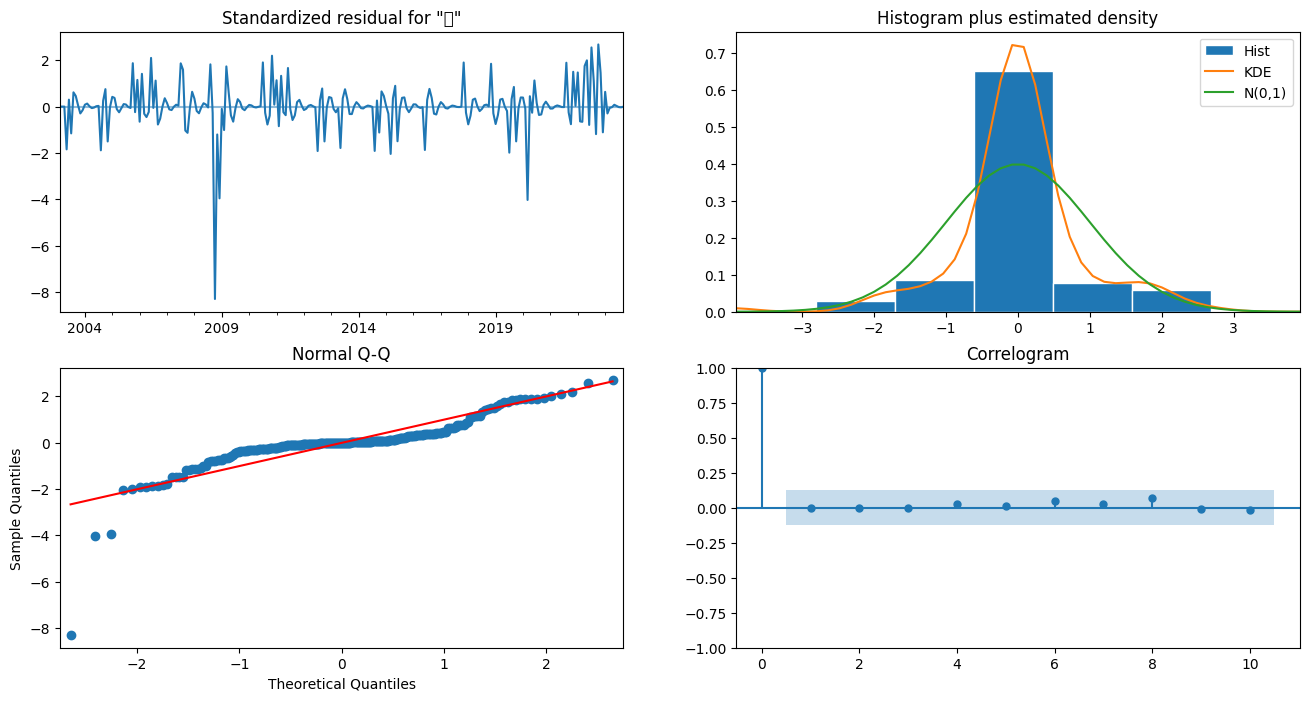

In [ ]:
rfit.plot_diagnostics(figsize=(16,8))
plt.show()

## 데이터 나누고 학습

In [ ]:
train_data, test_data = data[:int(len(data)*0.9)], data[int(len(data)*0.9):]

In [ ]:
model3 = ARIMA( train_data, order= (1,1,3) ) # ar, 차분, ma의 개수
rfit2 = model3.fit()

In [ ]:
rfit2.predict(typ='levels')

2003-01-01    0.000000
2003-02-01    4.250000
2003-03-01    4.250000
2003-04-01    4.250000
2003-05-01    4.250000
                ...   
2021-04-01    0.497759
2021-05-01    0.499419
2021-06-01    0.500817
2021-07-01    0.500615
2021-08-01    0.499871
Freq: MS, Name: predicted_mean, Length: 224, dtype: float64

In [ ]:
pred = rfit2.predict('2021-09-01','2023-09-01',typ='levels')
pred

2021-09-01    0.788942
2021-10-01    0.897187
2021-11-01    0.961597
2021-12-01    0.984078
2022-01-01    0.991925
2022-02-01    0.994664
2022-03-01    0.995620
2022-04-01    0.995953
2022-05-01    0.996070
2022-06-01    0.996110
2022-07-01    0.996125
2022-08-01    0.996130
2022-09-01    0.996131
2022-10-01    0.996132
2022-11-01    0.996132
2022-12-01    0.996132
2023-01-01    0.996132
2023-02-01    0.996132
2023-03-01    0.996132
2023-04-01    0.996132
2023-05-01    0.996132
2023-06-01    0.996132
2023-07-01    0.996132
2023-08-01    0.996132
2023-09-01    0.996132
Freq: MS, Name: predicted_mean, dtype: float64

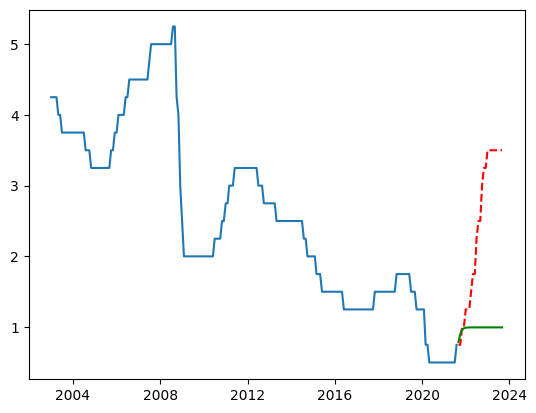

In [ ]:
plt.plot( train_data)
plt.plot( test_data,'r--')
plt.plot( pred ,'g-')
plt.show()